In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
df_2017= pd.read_csv('cleaned/income_2017.csv')
df_2018= pd.read_csv('cleaned/income_2018.csv')
df_2019= pd.read_csv('cleaned/income_2019.csv')


In [3]:
df_homeless = pd.read_csv('../Data Cleaning/2014-2021-PIT-esimates-cleanish.csv')

C:\Users\eswan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (543) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_homeless.head()

,Unnamed: 0,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
0,0,AK-500,Anchorage CoC,1023.0,188.0,146.0,689.0,665.0,86.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
1,1,AK-501,Alaska Balance of State CoC,761.0,209.0,56.0,496.0,474.0,119.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
2,2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1329.0,262.0,76.0,991.0,387.0,47.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,birmingham,al
3,3,AL-501,Mobile City & County/Baldwin County CoC,598.0,126.0,44.0,428.0,287.0,69.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,al
4,4,AL-502,Florence/Northwest Alabama CoC,209.0,50.0,6.0,153.0,38.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,florence,al


In [5]:
df_h = df_homeless[['Overall Homeless', 'City', 'State', 'year']]

In [6]:
df_h.head()

,Overall Homeless,City,State,year
0,1023.0,anchorage,ak,2014
1,761.0,anchorage,ak,2014
2,1329.0,birmingham,al,2014
3,598.0,mobile,al,2014
4,209.0,florence,al,2014


In [7]:
df_2017.head(10)

,city,state,median household income (dollars)_2017,monthly cost_2017,owner occupied income_2017,owner occupied cost_2017,renter occupied income_2017,renter occupied cost_2017
0,abbeville,la,41082,514,51168,399,23326,643
1,abbeville,sc,22898,549,32998,572,14408,544
2,abbotsford,wi,42043,608,53068,667,28594,576
3,aberdeen,ms,29317,578,44957,622,18199,537
4,aberdeen,sd,47342,721,70839,840,30029,641
5,aberdeen,wa,43287,803,59719,878,28528,744
6,aberdeen--bel air south--bel air north,md,81761,1390,96031,1503,42310,1176
7,abernathy,tx,48922,648,58542,630,35700,679
8,abilene,ks,46176,774,58927,898,23892,638
9,abilene,tx,45943,812,61388,778,35184,837


In [8]:
#df_2017.groupby('city')['renter occupied cost_2017'].sort_values(ascending=False).head(10)
df_2017.sort_values('renter occupied cost_2017' ,ascending=False).head(10)

,city,state,median household income (dollars)_2017,monthly cost_2017,owner occupied income_2017,owner occupied cost_2017,renter occupied income_2017,renter occupied cost_2017
2147,mountain house,ca,120439,2597,124862,2618,84807,2561
2098,montauk,ny,86852,1673,91154,1560,43750,2298
1566,kailua (honolulu county)--kaneohe,hi,99375,2143,117507,2073,70470,2246
861,discovery bay,ca,114148,2264,119773,2279,93641,2236
396,buckhead (bryan county),ga,116280,1960,119063,1840,93750,2219
3488,yountville,ca,70938,1438,72800,1130,65781,2012
3118,thousand oaks,ca,107024,2238,124856,2420,72723,1972
2821,san jose,ca,107171,2154,135840,2430,78840,1972
2073,mission viejo--lake forest--san clemente,ca,100469,2173,120723,2366,67076,1935
2599,princeville,hi,64167,1609,66875,1435,49688,1906


In [9]:
df_2018.head()

,city,state,median household income (dollars)_2018,monthly cost_2018,owner occupied income_2018,owner occupied cost_2018,renter occupied income_2018,renter occupied cost_2018
0,aberdeen--bel air south--bel air north,md,86876,1374,98033,1465,49084,1203
1,abilene,tx,46387,891,59643,733,35904,941
2,aguadilla--isabela--san sebastián,pr,17234,231,23313,182,10585,422
3,akron,oh,53755,836,72001,896,31025,782
4,albany,ga,40667,758,53671,793,29169,741


In [10]:
df_2018.sort_values('renter occupied cost_2018' ,ascending=False).head(10)

,city,state,median household income (dollars)_2018,monthly cost_2018,owner occupied income_2018,owner occupied cost_2018,renter occupied income_2018,renter occupied cost_2018
188,kailua (honolulu county)--kaneohe,hi,101055,2183,117880,1970,68750,2522
346,san jose,ca,127210,2423,157447,2616,95487,2320
222,livermore,ca,135351,2415,150971,2574,79893,2210
389,thousand oaks,ca,112088,2295,132194,2361,77776,2195
254,mission viejo--lake forest--san clemente,ca,109915,2282,130622,2381,75855,2183
83,concord,ca,130555,2386,158042,2652,86334,2048
296,petaluma,ca,100511,2050,116072,2100,71733,1998
57,camarillo,ca,91787,2124,111007,2228,76044,1991
142,gilroy--morgan hill,ca,118603,2349,141368,2721,82109,1962
344,san francisco--oakland,ca,105109,2120,138009,2435,79148,1935


In [11]:
df_2019.head()

,city,state,median household income (dollars)_2019,monthly cost_2019,owner occupied income_2019,owner occupied cost_2019,renter occupied income_2019,renter occupied cost_2019
0,aberdeen--bel air south--bel air north,md,90166,1388,103767,1463,52866,1285
1,abilene,tx,51913,864,69349,820,36183,882
2,aguadilla--isabela--san sebastián,pr,16582,193,20611,172,9248,412
3,akron,oh,51928,834,67171,866,31352,809
4,albany,ga,38440,799,56250,844,21425,777


In [12]:
df_2019.sort_values('renter occupied cost_2019' ,ascending=False).head(10)

,city,state,median household income (dollars)_2019,monthly cost_2019,owner occupied income_2019,owner occupied cost_2019,renter occupied income_2019,renter occupied cost_2019
188,kailua (honolulu county)--kaneohe,hi,106602,2177,122603,2004,70209,2415
346,san jose,ca,133543,2478,167708,2614,98793,2407
222,livermore,ca,136875,2528,164309,2609,95860,2404
389,thousand oaks,ca,117220,2433,137011,2583,81934,2282
84,concord,ca,136653,2448,162411,2682,93331,2241
254,mission viejo--lake forest--san clemente,ca,113540,2301,136697,2411,76752,2210
366,simi valley,ca,100320,2289,116155,2336,80281,2208
350,santa clarita,ca,103402,2267,123980,2425,65543,2084
142,gilroy--morgan hill,ca,118189,2428,161396,2860,72333,2065
58,camarillo,ca,91934,2035,106019,2022,71250,2050


In [13]:
df_merge = df_2017.merge(df_2018, on=['city', 'state'])

In [14]:
df_merge.head()

,city,state,median household income (dollars)_2017,monthly cost_2017,owner occupied income_2017,owner occupied cost_2017,renter occupied income_2017,renter occupied cost_2017,median household income (dollars)_2018,monthly cost_2018,owner occupied income_2018,owner occupied cost_2018,renter occupied income_2018,renter occupied cost_2018
0,aberdeen--bel air south--bel air north,md,81761,1390,96031,1503,42310,1176,86876,1374,98033,1465,49084,1203
1,abilene,tx,45943,812,61388,778,35184,837,46387,891,59643,733,35904,941
2,aguadilla--isabela--san sebastián,pr,15912,226,19894,184,10061,420,17234,231,23313,182,10585,422
3,akron,oh,49110,818,64792,877,28635,768,53755,836,72001,896,31025,782
4,albany,ga,38015,752,60370,852,25685,714,40667,758,53671,793,29169,741


In [15]:
df_merge_final = df_merge.merge(df_2019, on=['city', 'state'])

In [16]:
df_merge_final.head()

,city,state,median household income (dollars)_2017,monthly cost_2017,owner occupied income_2017,owner occupied cost_2017,renter occupied income_2017,renter occupied cost_2017,median household income (dollars)_2018,monthly cost_2018,owner occupied income_2018,owner occupied cost_2018,renter occupied income_2018,renter occupied cost_2018,median household income (dollars)_2019,monthly cost_2019,owner occupied income_2019,owner occupied cost_2019,renter occupied income_2019,renter occupied cost_2019
0,aberdeen--bel air south--bel air north,md,81761,1390,96031,1503,42310,1176,86876,1374,98033,1465,49084,1203,90166,1388,103767,1463,52866,1285
1,abilene,tx,45943,812,61388,778,35184,837,46387,891,59643,733,35904,941,51913,864,69349,820,36183,882
2,aguadilla--isabela--san sebastián,pr,15912,226,19894,184,10061,420,17234,231,23313,182,10585,422,16582,193,20611,172,9248,412
3,akron,oh,49110,818,64792,877,28635,768,53755,836,72001,896,31025,782,51928,834,67171,866,31352,809
4,albany,ga,38015,752,60370,852,25685,714,40667,758,53671,793,29169,741,38440,799,56250,844,21425,777


In [17]:
df_merge_final.shape

(435, 20)

In [18]:
df_2017.shape

(3501, 8)

In [19]:
df_2018.shape

(438, 8)

In [20]:
df_2019.shape

(438, 8)

In [21]:
df_h.columns = df_h.columns.str.lower()

In [22]:
df_h_2017 = df_h.loc[df_h['year'] == 2017]
df_h_2018 = df_h.loc[df_h['year'] == 2018]
df_h_2019 = df_h.loc[df_h['year'] == 2019]

In [23]:
df_h_2017.shape

(393, 4)

In [24]:
df_2017_w_homless = df_2017.merge(df_h_2017, on=['city', 'state'])
df_2018_w_homless = df_2018.merge(df_h_2018, on=['city', 'state'])
df_2019_w_homless = df_2019.merge(df_h_2019, on=['city', 'state'])

In [25]:
df_2017_w_homless.shape

(192, 10)

In [26]:
df_2018_w_homless.shape

(130, 10)

In [27]:
df_2019_w_homless.shape

(130, 10)

In [28]:
df_2019_w_homless.head()

,city,state,median household income (dollars)_2019,monthly cost_2019,owner occupied income_2019,owner occupied cost_2019,renter occupied income_2019,renter occupied cost_2019,overall homeless,year
0,akron,oh,51928,834,67171,866,31352,809,546.0,2019
1,albuquerque,nm,57603,978,71483,1037,38258,917,1524.0,2019
2,alexandria,la,45180,814,57644,730,35826,839,114.0,2019
3,amarillo,tx,49735,862,66512,904,32821,831,777.0,2019
4,anchorage,ak,80270,1403,106725,1618,49448,1207,1111.0,2019


In [29]:
df_2019_w_homless['overall homeless'].describe()

count     130.000000
mean     1182.753846
std      1486.218963
min        44.000000
25%       385.500000
50%       694.000000
75%      1341.250000
max      9706.000000
Name: overall homeless, dtype: float64

In [30]:
colors = {'red': df_2019_w_homless['overall homeless'] <3000,
         'blue': df_2019_w_homless['overall homeless']> 3000}

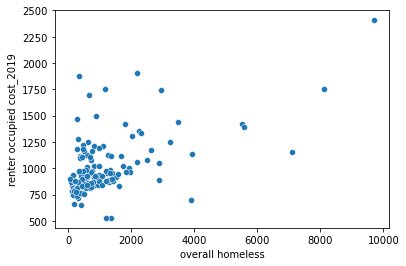

In [31]:
sns.scatterplot(data = df_2019_w_homless, x='overall homeless', y= 'renter occupied cost_2019');

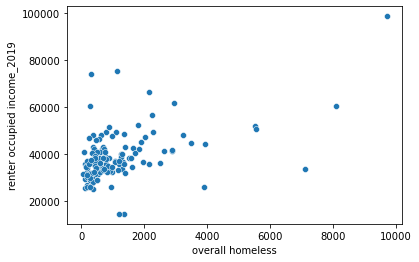

In [32]:
sns.scatterplot(data = df_2019_w_homless, x='overall homeless', y= 'renter occupied income_2019');

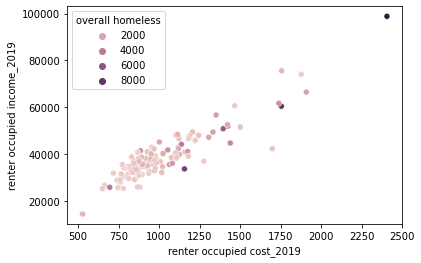

In [33]:
sns.scatterplot(data = df_2019_w_homless, x='renter occupied cost_2019', 
                y= 'renter occupied income_2019', hue='overall homeless');

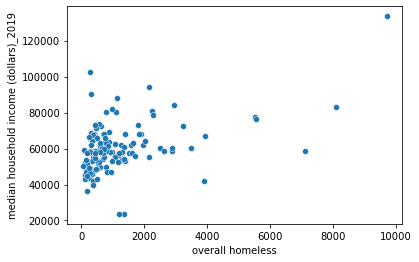

In [34]:
sns.scatterplot(data = df_2019_w_homless, x='overall homeless', y= 'median household income (dollars)_2019');

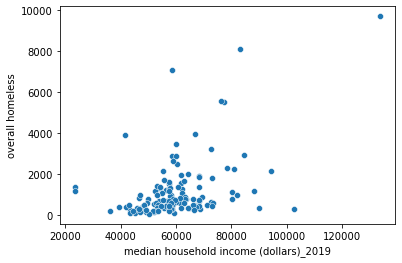

In [35]:
sns.scatterplot(data = df_2019_w_homless, x='median household income (dollars)_2019', y= 'overall homeless');

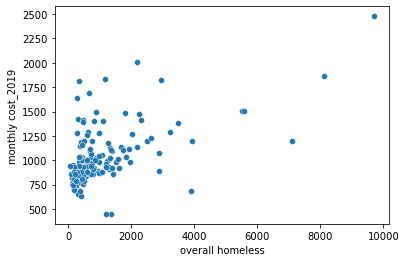

In [36]:
sns.scatterplot(data = df_2019_w_homless, x='overall homeless', y= 'monthly cost_2019');

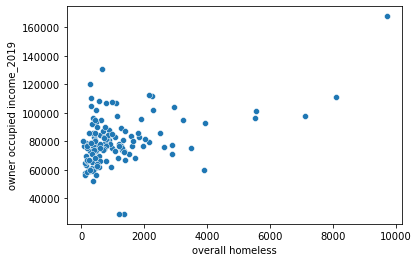

In [37]:
sns.scatterplot(data = df_2019_w_homless, x='overall homeless', y= 'owner occupied income_2019');

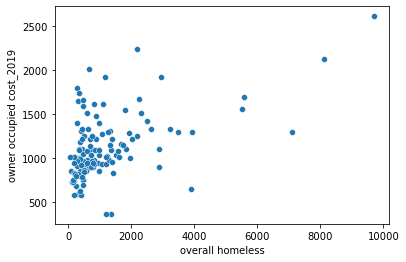

In [38]:
sns.scatterplot(data = df_2019_w_homless, x='overall homeless', y= 'owner occupied cost_2019');

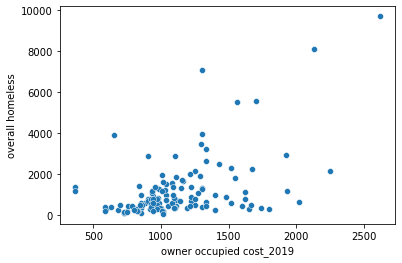

In [39]:
sns.scatterplot(data = df_2019_w_homless, x='owner occupied cost_2019', y= 'overall homeless');

<Figure size 1152x1440 with 0 Axes>

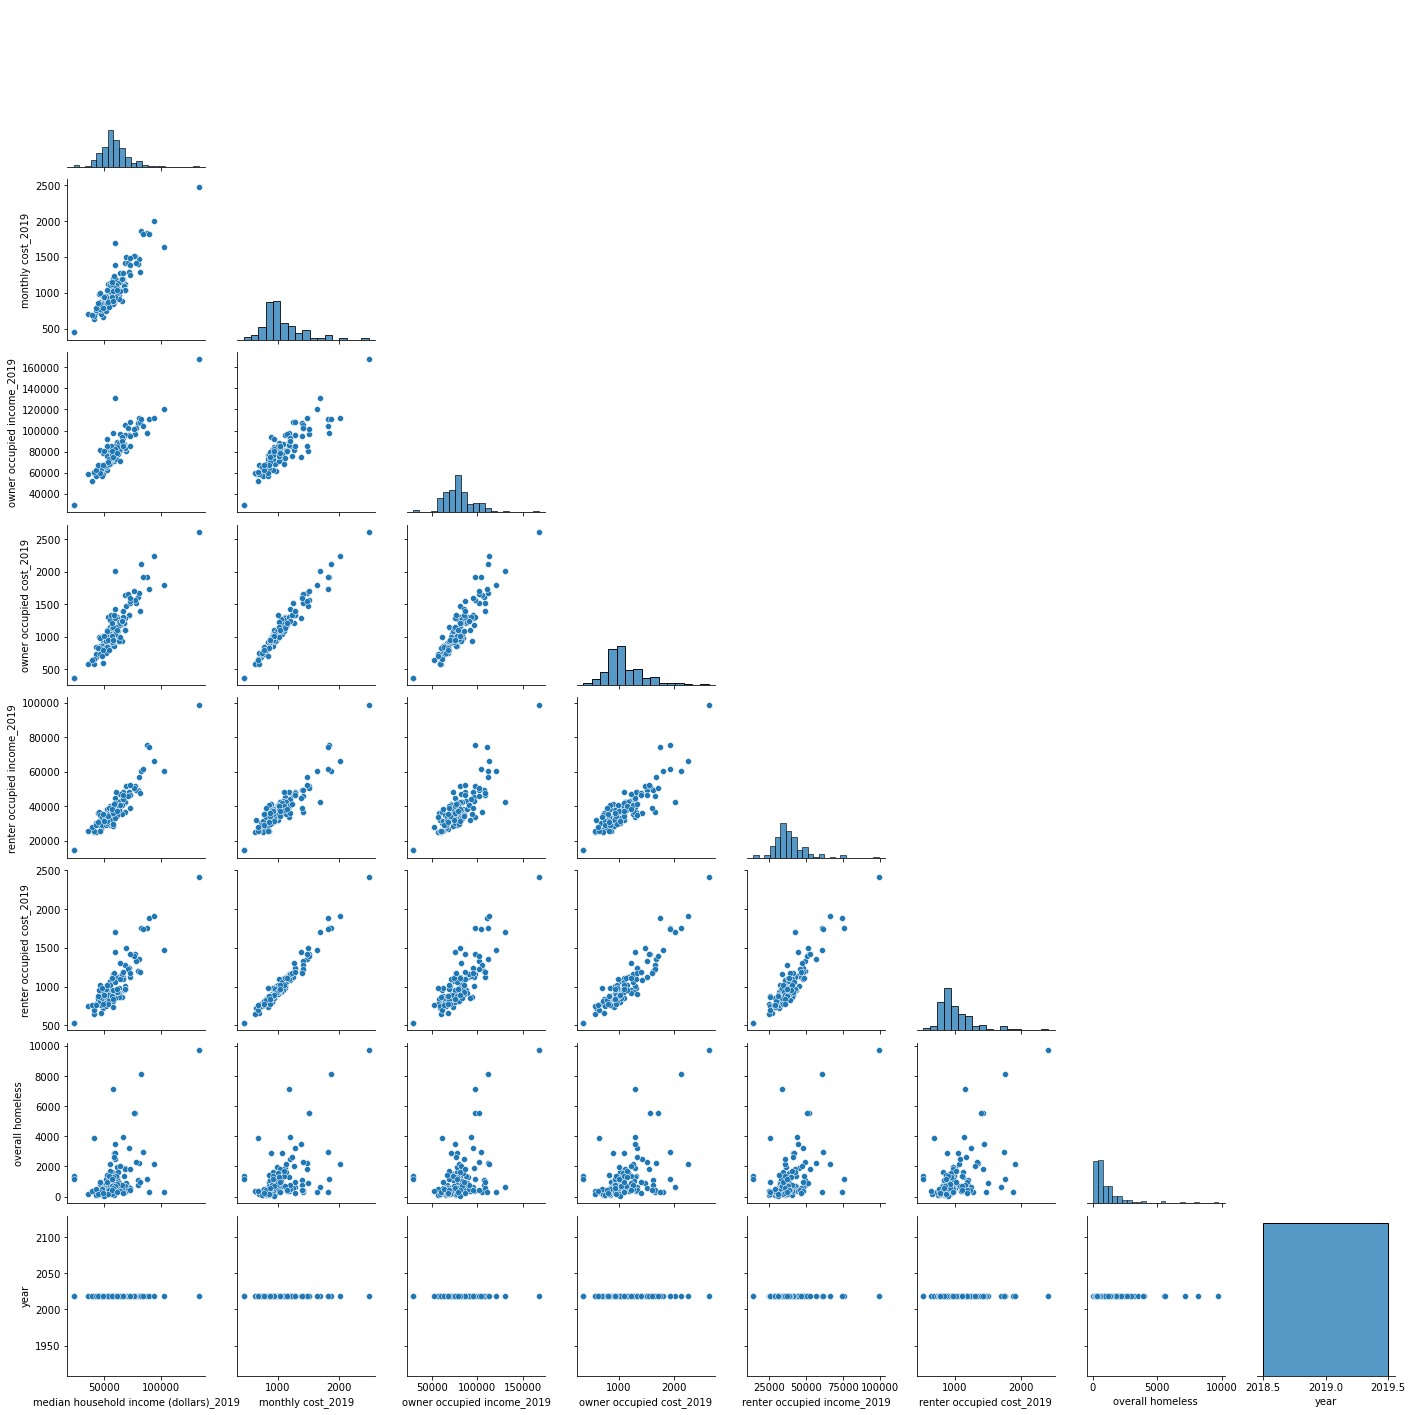

In [40]:
plt.figure(figsize=(16,20))
sns.pairplot(df_2019_w_homless, corner=True);

<Figure size 1152x1440 with 0 Axes>

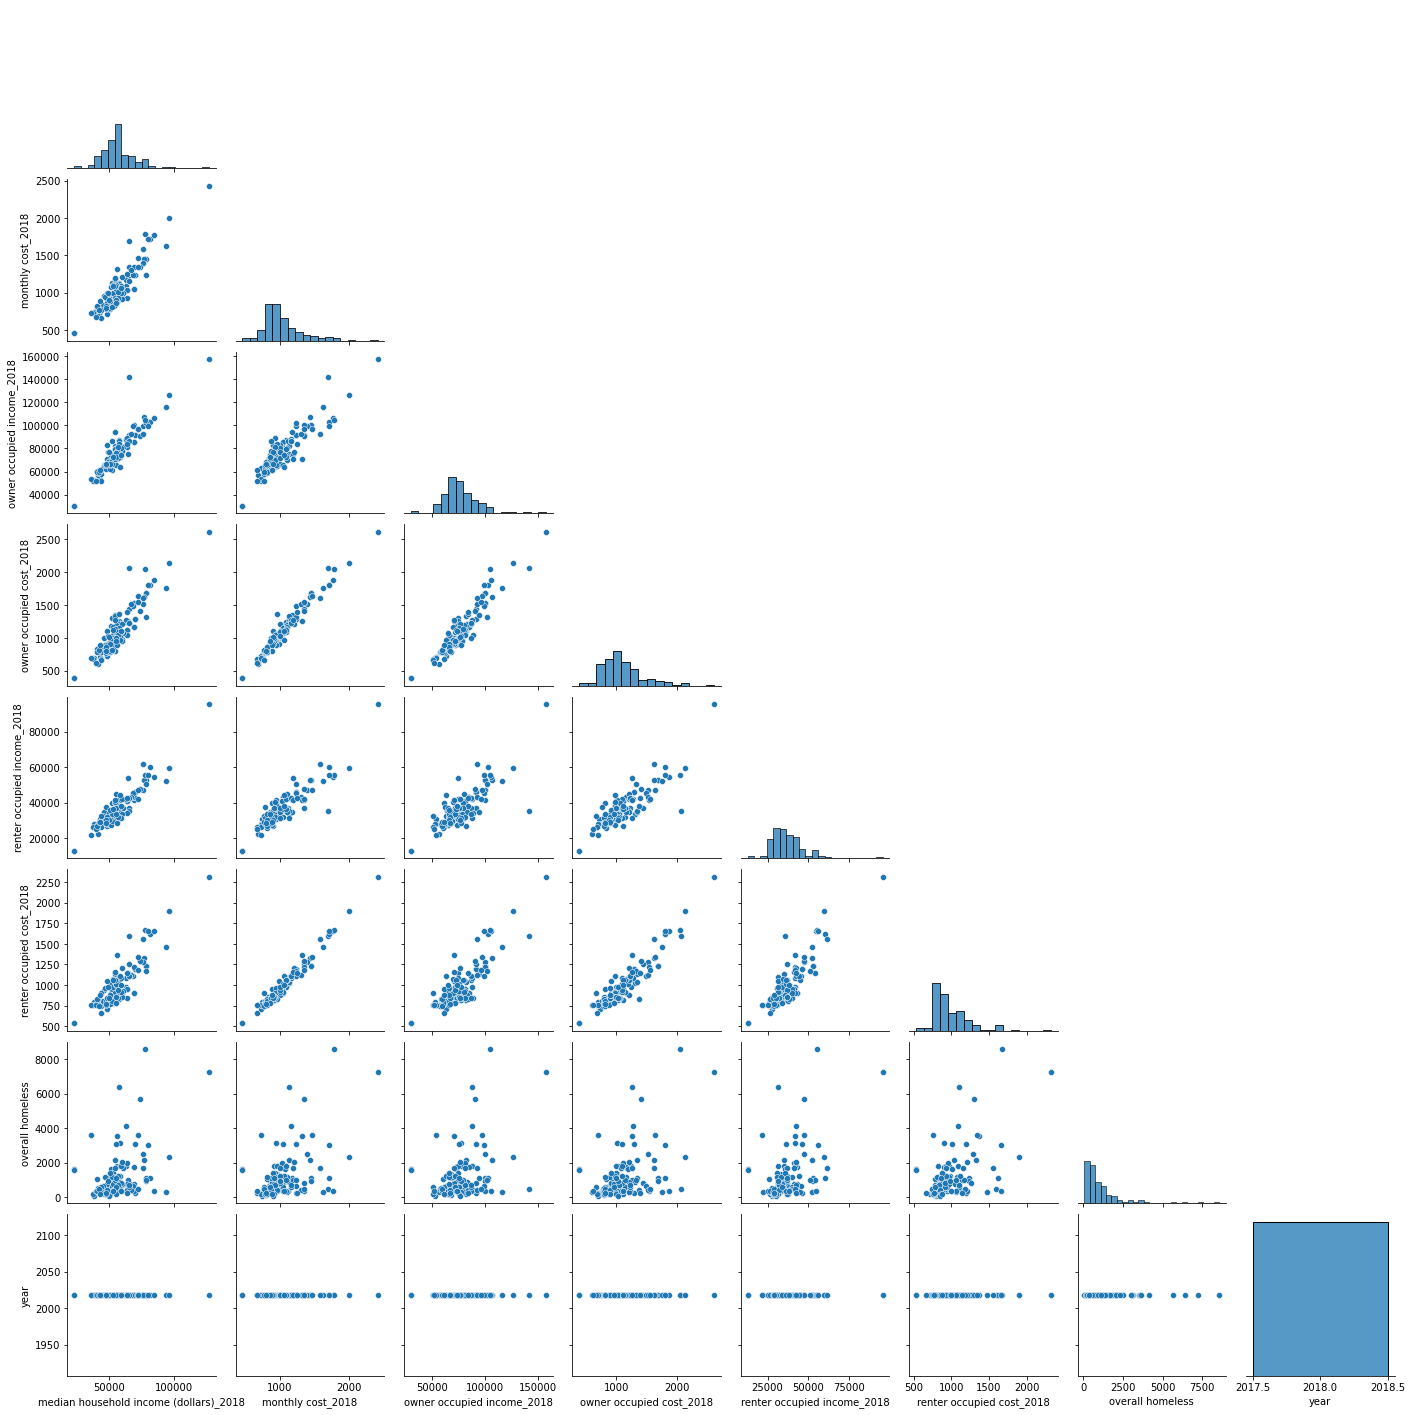

In [41]:
plt.figure(figsize=(16,20))
sns.pairplot(df_2018_w_homless, corner=True);

<Figure size 1152x1440 with 0 Axes>

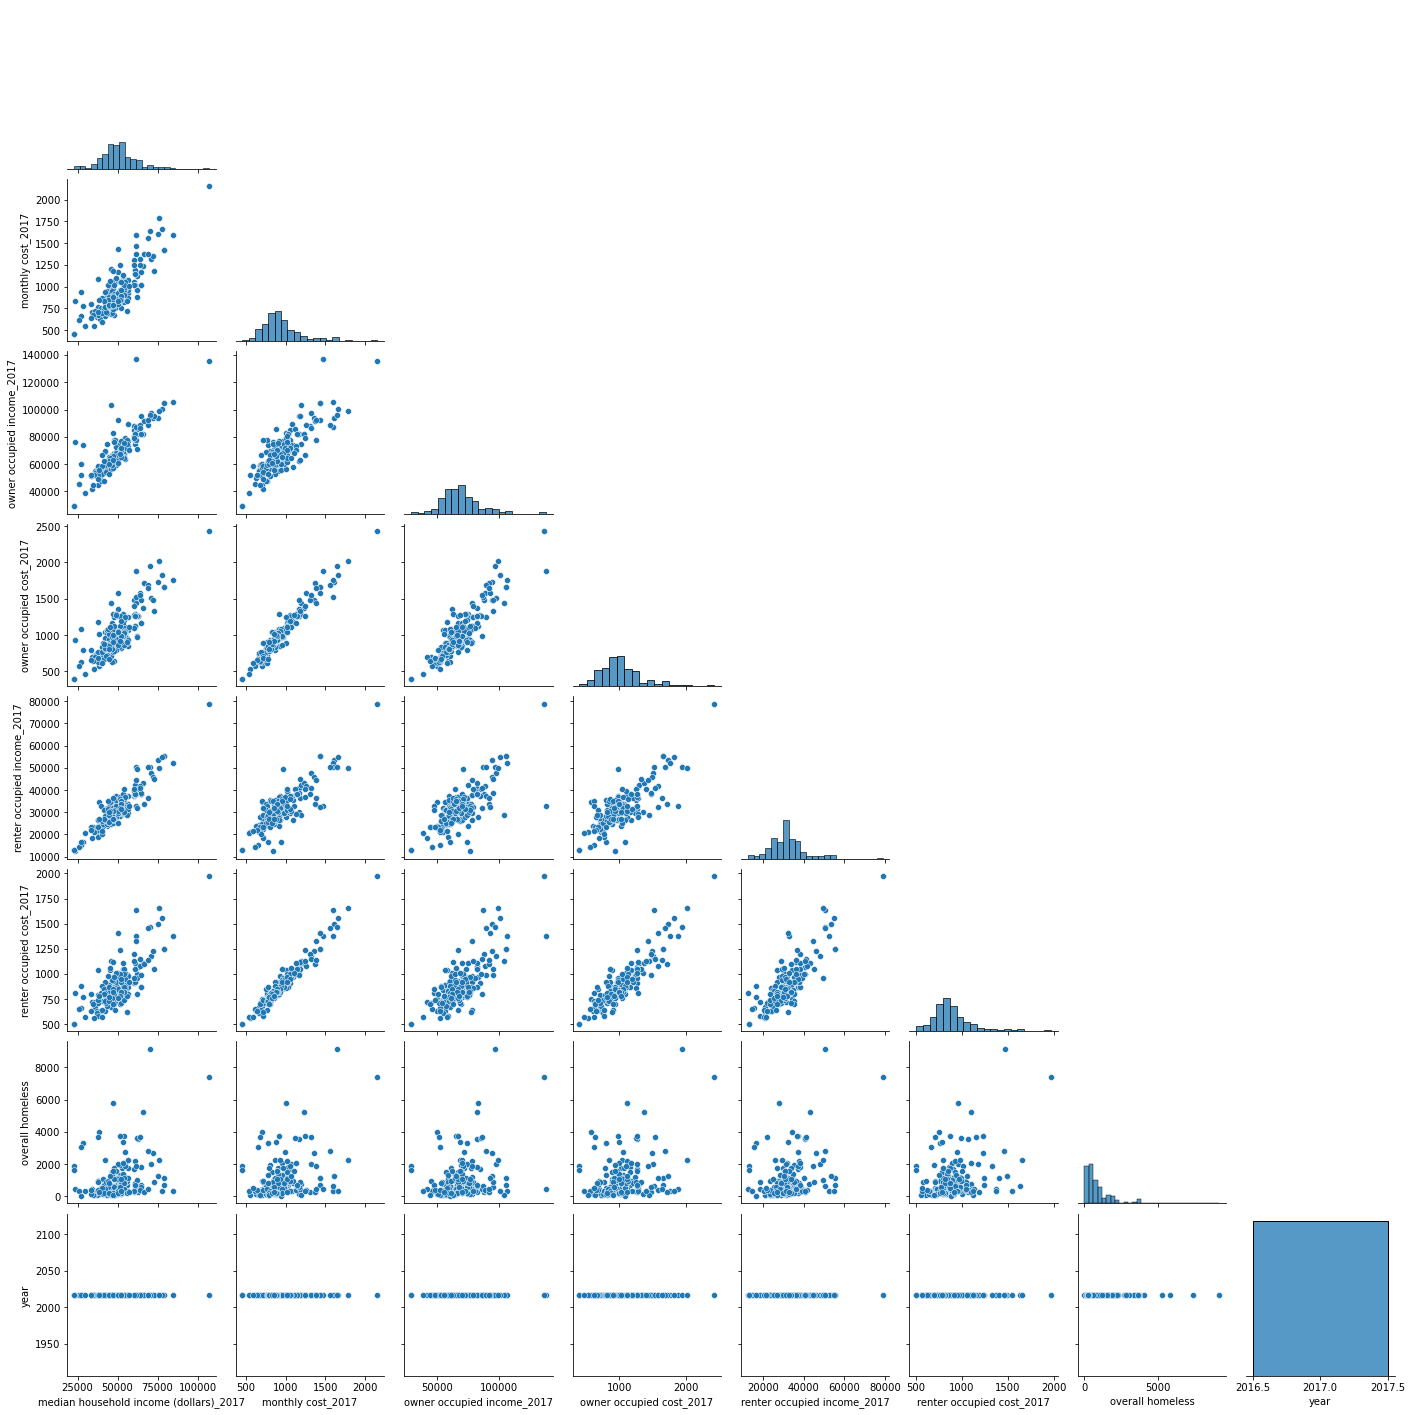

In [42]:
plt.figure(figsize=(16,20))
sns.pairplot(df_2017_w_homless, corner=True);

# Linear Regression model

In [43]:
df_2019_w_homless.columns

Index(['city', 'state', 'median household income (dollars)_2019',
       'monthly cost_2019', 'owner occupied income_2019',
       'owner occupied cost_2019', 'renter occupied income_2019',
       'renter occupied cost_2019', 'overall homeless', 'year'],
      dtype='object')

In [44]:

X = df_2019_w_homless.drop(columns=['overall homeless', 'year','city', 'state'])
y = df_2019_w_homless['overall homeless']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [48]:
lr.score(X_train, y_train)

0.339867321308001

In [49]:
lr.coef_

array([-0.06699058, -5.50987982,  0.02757495,  3.43267661, -0.03924106,
        7.23129309])

In [50]:
pd.DataFrame({
    'Features': X_train.columns,
    'Coef': lr.coef_
})

,Features,Coef
0,median household income (dollars)_2019,-0.066991
1,monthly cost_2019,-5.509880
2,owner occupied income_2019,0.027575
3,owner occupied cost_2019,3.432677
4,renter occupied income_2019,-0.039241
5,renter occupied cost_2019,7.231293


## For 2019

In [51]:
X = df_2019_w_homless.drop(columns=['overall homeless', 'year','city', 'state'])
y = df_2019_w_homless['overall homeless']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr_2019 = LinearRegression()
lr_2019.fit(X_train, y_train)

print(lr_2019.score(X_train, y_train))

pd.DataFrame({
    'Features': X_train.columns,
    'Coef': lr_2019.coef_
})


0.339867321308001


,Features,Coef
0,median household income (dollars)_2019,-0.066991
1,monthly cost_2019,-5.509880
2,owner occupied income_2019,0.027575
3,owner occupied cost_2019,3.432677
4,renter occupied income_2019,-0.039241
5,renter occupied cost_2019,7.231293


## for 2018

In [52]:
X = df_2018_w_homless.drop(columns=['overall homeless', 'year','city', 'state'])
y = df_2018_w_homless['overall homeless']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr_2018 = LinearRegression()
lr_2018.fit(X_train, y_train)

print(lr_2018.score(X_train, y_train))

pd.DataFrame({
    'Features': X_train.columns,
    'Coef': lr_2018.coef_
})


0.33832183032847496


,Features,Coef
0,median household income (dollars)_2018,0.047043
1,monthly cost_2018,-19.780523
2,owner occupied income_2018,-0.058219
3,owner occupied cost_2018,10.742639
4,renter occupied income_2018,-0.069455
5,renter occupied cost_2018,14.660927


## For 2017

In [53]:
X = df_2017_w_homless.drop(columns=['overall homeless', 'year','city', 'state'])
y = df_2017_w_homless['overall homeless']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr_2017 = LinearRegression()
lr_2017.fit(X_train, y_train)

print(lr_2017.score(X_train, y_train))

pd.DataFrame({
    'Features': X_train.columns,
    'Coef': lr_2017.coef_
})


0.1924814181942498


,Features,Coef
0,median household income (dollars)_2017,-0.061127
1,monthly cost_2017,4.741446
2,owner occupied income_2017,0.009311
3,owner occupied cost_2017,-1.146017
4,renter occupied income_2017,0.078904
5,renter occupied cost_2017,-1.960474


## 2019 Scaled

In [54]:
X = df_2019_w_homless.drop(columns=['overall homeless', 'year','city', 'state'])
y = df_2019_w_homless['overall homeless']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

lr_2019_sc = LinearRegression()
lr_2019_sc.fit(X_train_sc, y_train)

print(lr_2019_sc.score(X_train_sc, y_train))

inv_scaled = sc.inverse_transform(lr_2019_sc.coef_)

pd.DataFrame({
    'Features': X_train.columns,
    'Coef': inv_scaled
})
#'Coef': lr_2019_sc.coef_

0.3398673213080011


,Features,Coef
0,median household income (dollars)_2019,-1.077543e+07
1,monthly cost_2019,-4.273884e+05
2,owner occupied income_2019,6.886805e+06
3,owner occupied cost_2019,3.887882e+05
4,renter occupied income_2019,-3.602553e+06
5,renter occupied cost_2019,4.529287e+05


In [55]:
X = df_2019_w_homless.drop(columns=['overall homeless', 'year','city', 'state'])
y = df_2019_w_homless['overall homeless']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

lr_2019_sc = LinearRegression()
lr_2019_sc.fit(X_train_sc, y_train)

print(lr_2019_sc.score(X_train_sc, y_train))

#nv_scaled = sc.inverse_transform(lr_2019_sc.coef_)

pd.DataFrame({
    'Features': X_train.columns,
    'Coef': lr_2019_sc.coef_
})
#

0.3398673213080011


,Features,Coef
0,median household income (dollars)_2019,-851.932335
1,monthly cost_2019,-1536.394158
2,owner occupied income_2019,433.298791
3,owner occupied cost_2019,1153.637482
4,renter occupied income_2019,-377.962893
5,renter occupied cost_2019,1807.797007
